In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from glob import glob1
from scipy.io import savemat

In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family']='arial'
params = {'legend.edgecolor': '0',
          'lines.markersize' : 3,
          'legend.borderaxespad': 1.5,
          'legend.fancybox': False,
          'legend.fontsize': 20.0,
          'legend.framealpha': 0.5,
          'legend.labelspacing': 0.3,
          'legend.markerscale': 1.0,
          'figure.figsize': (5,4),
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'axes.linewidth': 3,
         'axes.xmargin': 0.03,
         'axes.ymargin': 0.03,
         'xtick.direction': 'in',
         'xtick.labelsize': 30,
         'xtick.major.pad': 10,
         'xtick.major.size': 10,
         'xtick.major.width': 3,
         'xtick.minor.pad': 10,
         'xtick.minor.size': 5,
         'xtick.minor.visible': True,
         'xtick.minor.width': 2,
         'xtick.top': True,
         'ytick.direction': 'in',
         'ytick.labelsize': 30,
         'ytick.major.pad': 10,
         'ytick.major.size': 10,
         'ytick.major.width': 3,
         'ytick.minor.pad': 10,
         'ytick.minor.size': 5,
         'ytick.minor.visible': True,
         'ytick.minor.width': 2,
         'ytick.right': True,}
plt.rcParams.update(params)

In [15]:
def Gaussianfit(x,y,ax=None,isplot=False):
    from lmfit.models import GaussianModel
    mod = GaussianModel()
    params = mod.guess(y,x=x)
    result = mod.fit(y,params,x=x)
    if isplot:
        if ax is None:
            f = plt.figure()
            ax = f.add_subplot(111)
        
        dummyx = np.linspace(min(x),max(x),1000)
        ax.plot(dummyx,mod.eval(result.params,x=dummyx),color='darkorange')
        ax.plot(x,y,'-o',alpha=0.75,color='navy')
        try:
            ax.set_title('FWHM = %.3f +- %.3f'%(result.params['fwhm'].value,result.params['fwhm'].stderr))
        except:
            ax.set_title('FWHM = %.3f +- %.3f'%(result.params['fwhm'].value,0))
    return result, mod
    

In [16]:
def npz2mat(filename_npz):
    from scipy.io import savemat
    data = np.load(filename_npz)
    mdic = {"time_in_s": data['time_s'], 'spectrum': data['spectra'],'frequency_Hz': data['freq'] }
    savemat(filename_npz[:-4]+'.mat',mdic)

# filename = r'Z:\qfc\users\Armin\Ben_spectrums\12042022_QSIMQFC_beat_001.npz'
# npz2mat(filename)

# Start monitoring

In [5]:
from rohdeschwarzfpc import FPC

sa = FPC(address= 'TCPIP::169.254.115.38::inst0::INSTR') # FCV3000 spectrum analyzer
# sa = FPC(address='TCPIP0::FPC1500-102158::inst0::INSTR') # FPC1500 spectrum analyzer


ModuleNotFoundError: No module named 'rohdeschwarzfpc'

Data saved as Z:\qfc\users\Armin\clock_fluctuations\27042022_clock_fromlasertable_fpc1500_10HzRBW_chn2


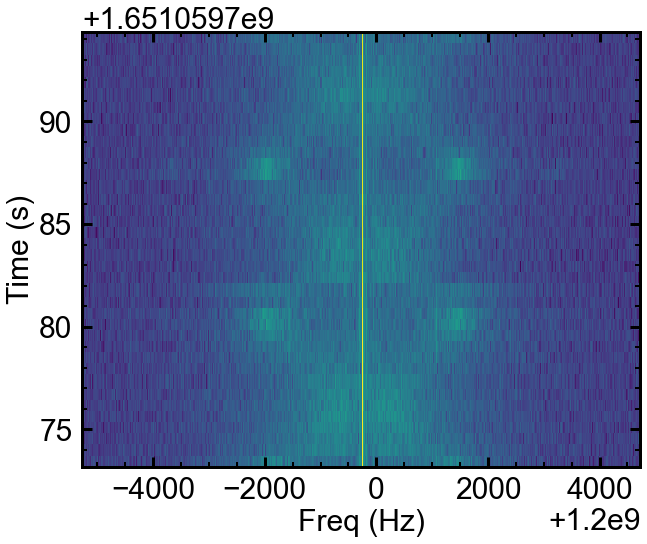

In [9]:
# acquire data every second
directory = r'Z:\qfc\users\Armin\clock_fluctuations'
saved_filename = os.path.join(directory,'27042022_clock_fromlasertable_fpc1500_10HzRBW_chn2')

issaved = True
isplot = True
total_time = int(20)# second

wait_time = 0.510 # second
cnt = int(total_time/wait_time) # spectra

aryx= []
aryy=[]
time_stamp = []

try:
    while cnt!=0:
        if cnt%50==0:
            print (cnt)
        tr = sa.get_trace(n=1)
        aryx.append(tr['x'])
        aryy.append(tr['y'])
        time_stamp.append(time.time())
        time.sleep(wait_time)
        cnt -= 1
except:
    pass
finally:
    
    out = np.array(aryy)
    x = np.array(aryx)
    timex = np.array(time_stamp) # - time_stamp[0]

    if issaved:
        np.savez(saved_filename,time_s = timex, spectra=out, freq = x)
        print('Data saved as %s'%saved_filename)
    if isplot:
        plt.pcolormesh(x,timex,np.log10(out))
        plt.xlabel('Freq (Hz)')
        plt.ylabel('Time (s)')
        plt.savefig(saved_filename+'.png',dpi=100,bbox_inches='tight',facecolor='white')

# open the npz file

Text(0, 0.5, 'Time (s)')

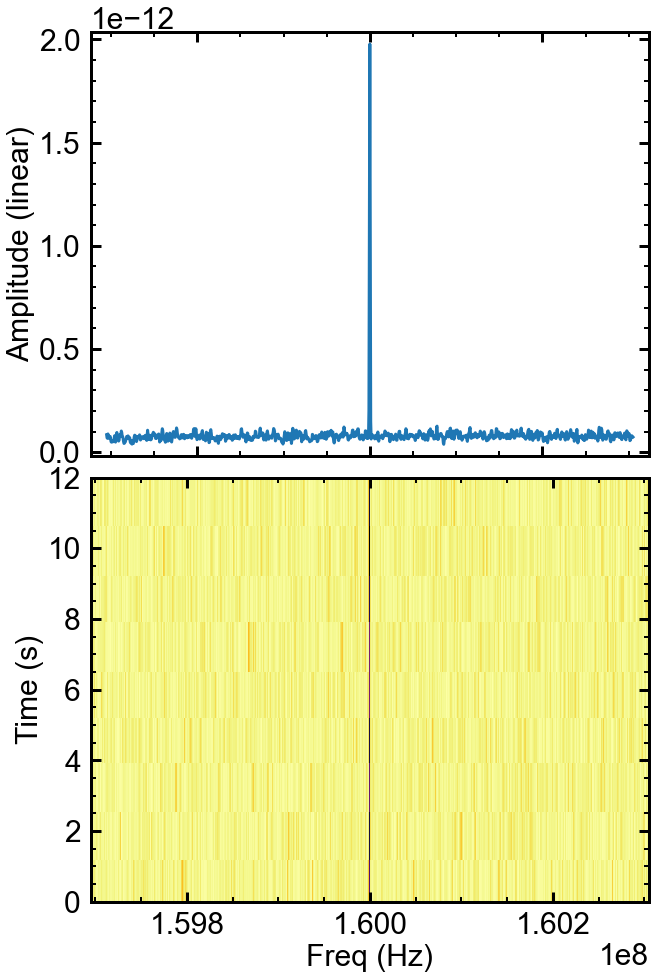

In [7]:
# colormap
directory = r'Z:\qfc\users\Armin\spectrum_analyser_traces'
# directory = r'Z:\qfc\users\Armin\timetagging_zerocrossing'
saved_filename = os.path.join(directory,"06042022_QSIMQFC_beat")
# saved_filename = os.path.join(directory,"25042022_after_mixer")
data = np.load(saved_filename+'.npz')
time_in_s = data['time_s']
spectra_linear = data['spectra']
freq_hz = data['freq']

# freq_Hz_0 = np.median(freq_hz)
f = plt.figure(figsize=(10,16))
f.subplots_adjust(hspace=0.05)
ax0 = f.add_subplot(211)
ax0.plot(freq_hz[0], np.mean(spectra_linear,axis=0))
ax0.set_xticklabels([])
ax0.set_ylabel('Amplitude (linear)')

ax = f.add_subplot(212)
ax.pcolormesh(freq_hz,time_in_s,(spectra_linear),cmap='inferno_r')
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('Time (s)')

# f.savefig(saved_filename+'_detail.png',dpi=100,bbox_inches='tight',facecolor='white')

# Get spectra from FPC1500 and FSV3000: live

In [5]:
from rohdeschwarzfpc import FPC
sa = FPC(address= 'TCPIP::169.254.115.38::inst0::INSTR') # FCV3000 spectrum analyzer
# sa = FPC(address='TCPIP0::FPC1500-102158::inst0::INSTR') # FPC1500 spectrum analyzer

In [31]:

saved_filename = r'C:\Users\ZakKoong\Desktop\20220923_QSIM_QFC_beatspectrum_1khz.mat'


savemat
tr = sa.get_trace(n=1)
x0 = np.median(tr['x'])
y = tr['y']/max(tr['y'])
# freq = x0

freq = []
amp = []
time_s = []
for j in range(10):
    tr = sa.get_trace(n=1)
    time_s.append(time.time())
    x = tr['x']
    y = tr['y']
    freq.append(x)
    amp.append(y)
    time.sleep(2)
    
mdic = {"time_in_s": time_s, 'spectrum': y,'frequency_Hz': x}
savemat(saved_filename,mdic)
# np.savetxt(r'C:\Users\ZakKoong\Desktop\20220923_QSIM_QFC_beatspectrum_1khz_freq.txt',freq)
# np.savetxt(r'C:\Users\ZakKoong\Desktop\20220923_QSIM_QFC_beatspectrum_1kHz_amp.txt',amp)

# # plt.plot(tr['x']-x0,tr['y'])

# start = time.time()


# res,mod = Gaussianfit(tr['x']-x0,y,isplot=True)
# print (f'Elapsed: {time.time()-start:.3f}s')

# print ('Resolution is %.3f Hz'%np.diff(tr['x'])[0])
# # plt.yscale('log')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amp (arb. units)')
# np.savez(saved_filename+'_%.0f_Hz.npz'%freq,freq=tr['x'],amplitude=tr['y'])
# plt.savefig(saved_filename+'_%.0f_Hz.png'%freq,dpi=100,bbox_inches='tight',facecolor='white')
# plt.xlim(-1000,1000)

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\lib\site-packages\pyvisa\highlevel.py", line 3073, in close
    resource.close()
  File "C:\ProgramData\Miniconda3\lib\site-packages\pyvisa\resources\resource.py", line 315, in close
    self.visalib.close(self.session)
  File "C:\ProgramData\Miniconda3\lib\site-packages\pyvisa\ctwrapper\functions.py", line 637, in close
    return library.viClose(session)
  File "C:\ProgramData\Miniconda3\lib\site-packages\pyvisa\ctwrapper\highlevel.py", line 226, in _return_handler
    return self.handle_return_value(session, ret_value)  # type: ignore
  File "C:\ProgramData\Miniconda3\lib\site-packages\pyvisa\highlevel.py", line 251, in handle_return_value
    raise errors.VisaIOError(rv)
pyvisa.errors.VisaIOError: VI_ERROR_CLOSING_FAILED (-1073807338): The VISA driver failed to properly close the session or object reference. This might be due to an error freeing internal or OS resources, a failed ne

# Keysight oscilloscope

In [5]:
import keyoscacquire as koa
SCOPE_VISA_ADDRESS = 'USB0::0x0957::0x1796::MY57233528::INSTR'  # MSOX3104T

In [17]:
scope = koa.Oscilloscope(address=SCOPE_VISA_ADDRESS)
start = time.time()
time_x, y, channel_numbers = scope.get_trace(channels=[2,4])
print (f'Elapsed: {time.time()-start:.3f}s')
chn2 = y[:,0]
chn4 = y[:,1]
saved_directory = r'Z:\qfc\users\Armin\vibration_measurements'
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = os.path.join(saved_directory,'%s_vibration_data'%timestr)
np.savez(filename+'_justwire_justwire',timeosc=time_x[:,0],
        chn2 = chn2,
        cn4 = chn4)
from fourier import fourier2

chn2x,chn2y = fourier2(time_x.flatten(),chn2.flatten())
plt.loglog(chn2x,chn2y,label='chn2: top of the box')

chn4x,chn4y = fourier2(time_x.flatten(),chn4.flatten())
plt.loglog(chn4x,chn4y,label='chn4: breadboard')


print (f'Resolution is {np.diff(chn2x)[0]:.3f}Hz')
# scope.save_trace(fname='lugia.csv',showplot=False)

NameError: name 'koa' is not defined

(0.0, 1000.0)

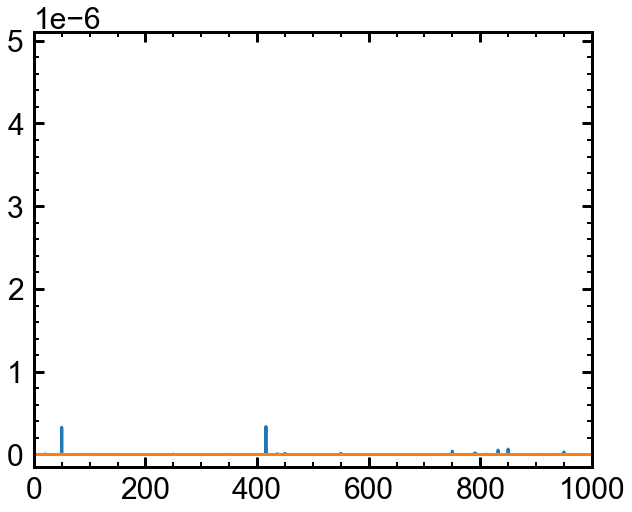

In [52]:
plt.plot(chn2x,chn2y)
plt.plot(chn4x,chn4y)
plt.xlim(left=0,right=1000)
# plt.yscale('log')